# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
print(weather_api_key)

3cd48a9163a47010816ddef4c58fde19


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 582


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?q=Singapore&appid=3cd48a9163a47010816ddef4c58fde19"

# Define an empty list to fetch the weather data for each city

city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid=3cd48a9163a47010816ddef4c58fde19"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | papatowai
Processing Record 3 of Set 1 | saint-felicien
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | peace river
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | georgetown
Processing Record 9 of Set 1 | smithers
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | greymouth
Processing Record 12 of Set 1 | polyarnyy
Processing Record 13 of Set 1 | badger
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | mirny
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | kekri
Processing Record 18 of Set 1 | kinkala
Processing Record 19 of Set 1 | crucecita
Processing Record 20 of Set 1 | lodja
Processing Record 21 of Set 1 | stanley
Processing Record 22 of Set 1 | jamestown
Processing Record 23

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
print(city_data_df.head())

# Show Record Count
record_count = city_data_df.count()
record_count


             City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0       adamstown -25.0660 -130.1015    296.19        84         100   
1       papatowai -46.5619  169.4708    287.38        68           8   
2  saint-felicien  48.6501  -72.4491    288.53        23         100   
3  puerto natales -51.7236  -72.4875    276.13        82          99   
4     peace river  56.2501 -117.2860    288.32        30          75   

   Wind Speed Country        Date  
0        7.55      PN  1714260143  
1        1.12      NZ  1714260143  
2        4.12      CA  1714260143  
3       10.20      CL  1714260143  
4        3.09      CA  1714260143  


City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,296.19,84,100,7.55,PN,1714260143
1,papatowai,-46.5619,169.4708,287.38,68,8,1.12,NZ,1714260143
2,saint-felicien,48.6501,-72.4491,288.53,23,100,4.12,CA,1714260143
3,puerto natales,-51.7236,-72.4875,276.13,82,99,10.20,CL,1714260143
4,peace river,56.2501,-117.2860,288.32,30,75,3.09,CA,1714260143


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,296.19,84,100,7.55,PN,1714260143
1,papatowai,-46.5619,169.4708,287.38,68,8,1.12,NZ,1714260143
2,saint-felicien,48.6501,-72.4491,288.53,23,100,4.12,CA,1714260143
3,puerto natales,-51.7236,-72.4875,276.13,82,99,10.20,CL,1714260143
4,peace river,56.2501,-117.2860,288.32,30,75,3.09,CA,1714260143


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

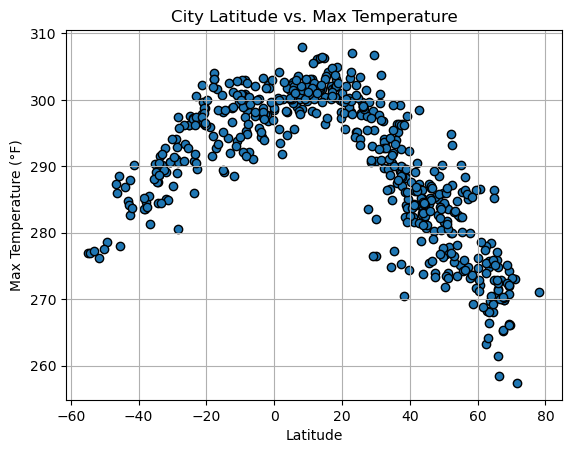

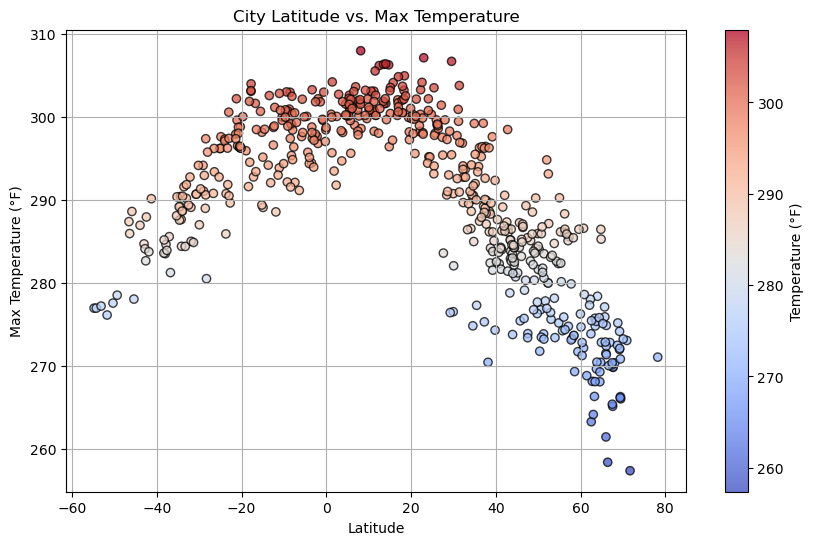

<Figure size 640x480 with 0 Axes>

In [9]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

# Create DataFrame from city_data list
city_data_df = pd.DataFrame(city_data)

# Plot scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Add labels and title
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")

# Add grid
plt.grid(True)

# Display the plot
plt.show()



# Incorporate the other graph properties
# YOUR CODE HERE


# Create DataFrame from city_data list
city_data_df = pd.DataFrame(city_data)

# Set up the figure size
plt.figure(figsize=(10, 6))

# Plot scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], c=city_data_df["Max Temp"], cmap="coolwarm", 
            edgecolors="black", alpha=0.75)

# Add labels and title
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")

# Add a color bar
cbar = plt.colorbar()
cbar.set_label("Temperature (°F)")

# Add grid
plt.grid(True)

# Save the plot to an image file
plt.savefig("latitude_vs_temperature.png")

# Display the plot
plt.show()



# Define the directory path
directory = "output_data"

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)
    


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

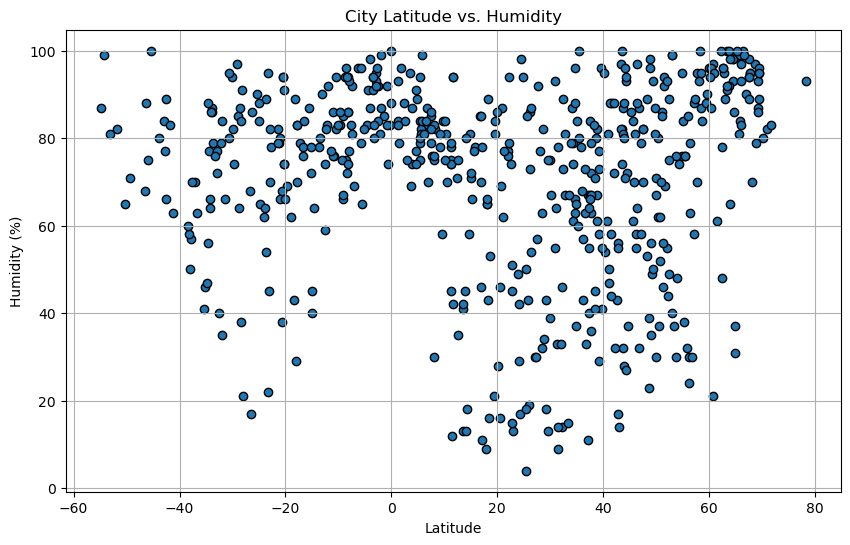

             City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0       adamstown -25.0660 -130.1015    296.19        84         100   
1       papatowai -46.5619  169.4708    287.38        68           8   
2  saint-felicien  48.6501  -72.4491    288.53        23         100   
3  puerto natales -51.7236  -72.4875    276.13        82          99   
4     peace river  56.2501 -117.2860    288.32        30          75   

   Wind Speed Country        Date  
0        7.55      PN  1714260143  
1        1.12      NZ  1714260143  
2        4.12      CA  1714260143  
3       10.20      CL  1714260143  
4        3.09      CA  1714260143  


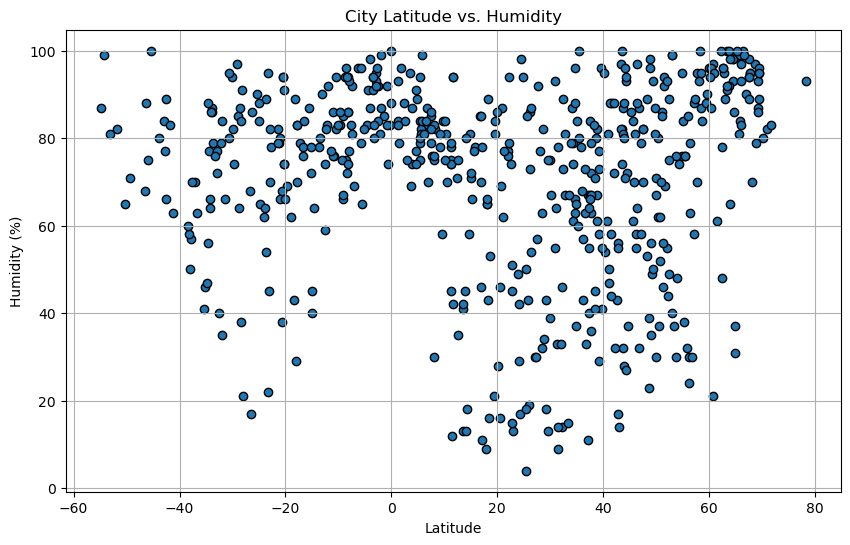

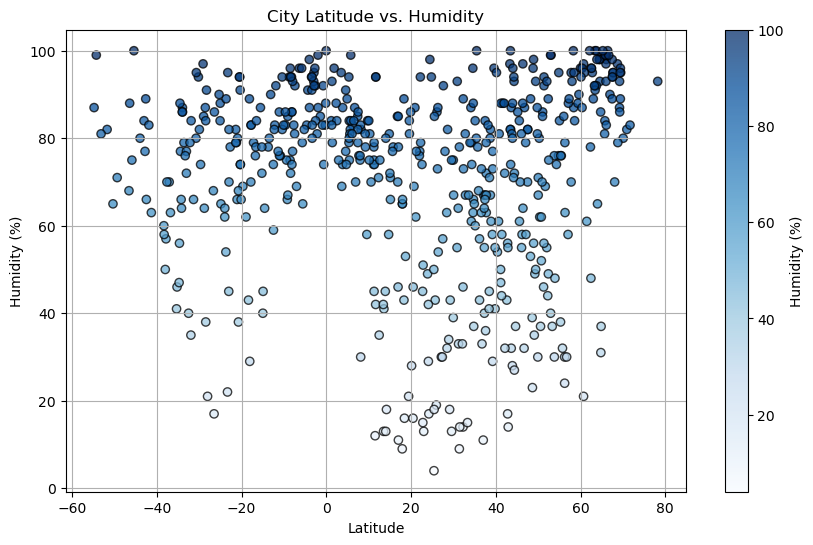

             City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0       adamstown -25.0660 -130.1015    296.19        84         100   
1       papatowai -46.5619  169.4708    287.38        68           8   
2  saint-felicien  48.6501  -72.4491    288.53        23         100   
3  puerto natales -51.7236  -72.4875    276.13        82          99   
4     peace river  56.2501 -117.2860    288.32        30          75   

   Wind Speed Country        Date  
0        7.55      PN  1714260143  
1        1.12      NZ  1714260143  
2        4.12      CA  1714260143  
3       10.20      CL  1714260143  
4        3.09      CA  1714260143  


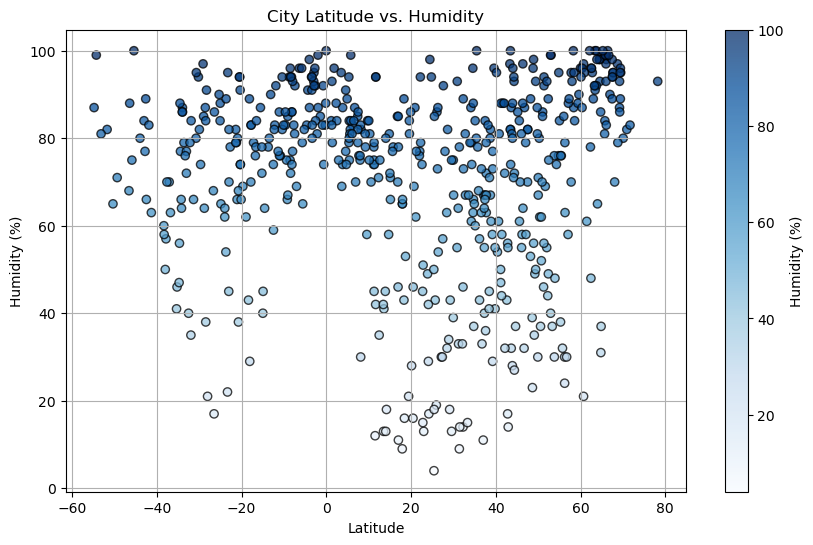

<Figure size 640x480 with 0 Axes>

In [10]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Create scatter plot for latitude vs. humidity
plt.figure(figsize=(10, 6))  # Set up the figure size
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Add labels and title
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Add grid
plt.grid(True)

# Display the plot
plt.show()



# Create DataFrame from city_data list
city_data_df = pd.DataFrame(city_data)
print(city_data_df.head())




# Set up the figure size
plt.figure(figsize=(10, 6))

# Plot scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Add labels and title
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Add grid
plt.grid(True)

# Display the plot
plt.show()




# Incorporate the other graph properties
# YOUR CODE HERE


# Set up the figure size
plt.figure(figsize=(10, 6))

# Create scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], c=city_data_df["Humidity"], cmap="Blues", 
            marker="o", edgecolors="black", alpha=0.75)

# Add labels and title
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Add a color bar
cbar = plt.colorbar()
cbar.set_label("Humidity (%)")

# Add grid
plt.grid(True)

# Save the plot to an image file
plt.savefig("latitude_vs_humidity.png")

# Display the plot
plt.show()




# Create DataFrame from city_data list
city_data_df = pd.DataFrame(city_data)
print(city_data_df.head())



# Set up the figure size
plt.figure(figsize=(10, 6))

# Plot scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], c=city_data_df["Humidity"], cmap="Blues", 
            edgecolors="black", alpha=0.75)

# Add labels and title
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Add a color bar
cbar = plt.colorbar()
cbar.set_label("Humidity (%)")

# Add grid
plt.grid(True)

# Display the plot
plt.show()


# Define the directory path
directory = "output_data"

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)



# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

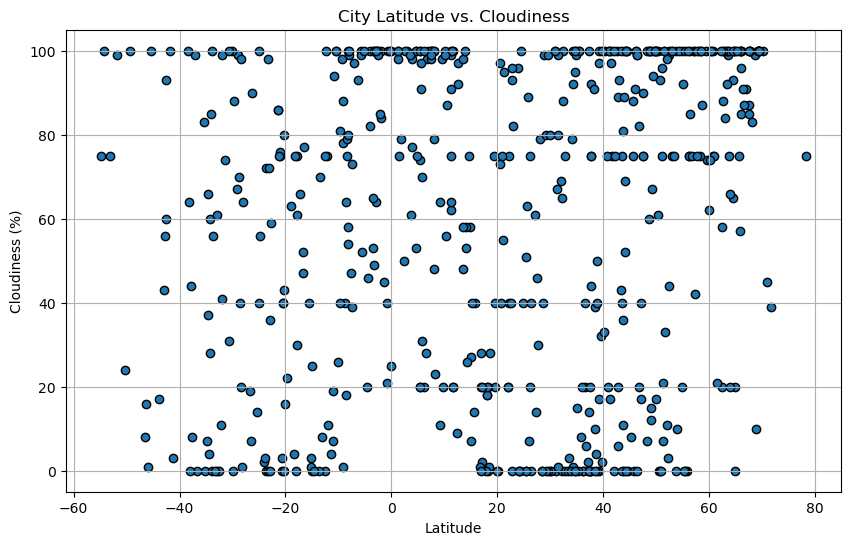

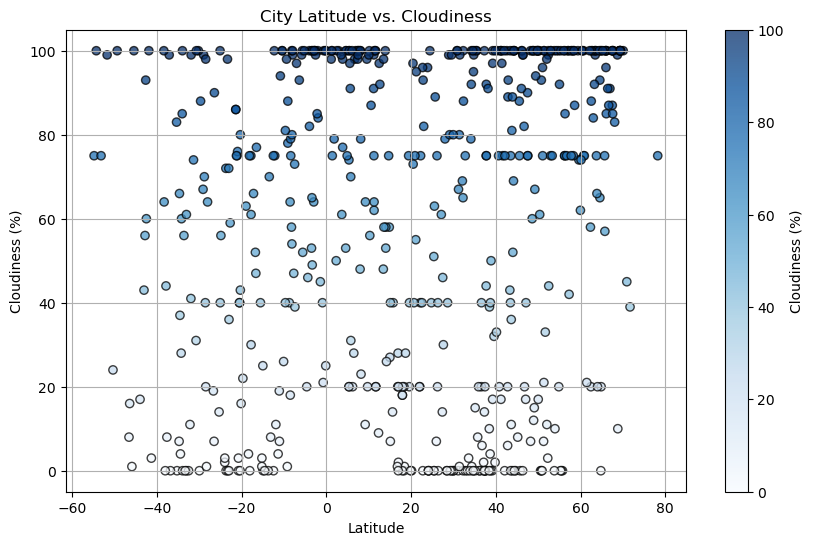

<Figure size 640x480 with 0 Axes>

In [11]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Set up the figure size
plt.figure(figsize=(10, 6))

# Create scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Add labels and title
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Add grid
plt.grid(True)

# Display the plot
plt.show()



# Incorporate the other graph properties
# YOUR CODE HERE


# Set up the figure size
plt.figure(figsize=(10, 6))

# Create scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], c=city_data_df["Cloudiness"], cmap="Blues", 
            marker="o", edgecolors="black", alpha=0.75)

# Add labels and title
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Add a color bar
cbar = plt.colorbar()
cbar.set_label("Cloudiness (%)")

# Add grid
plt.grid(True)

# Save the plot to an image file
plt.savefig("latitude_vs_cloudiness.png")

# Display the plot
plt.show()



# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)



# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

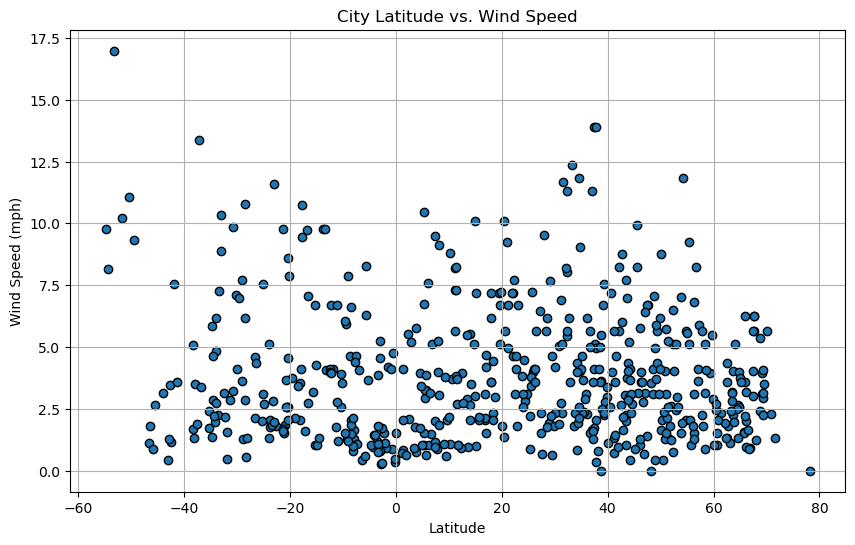

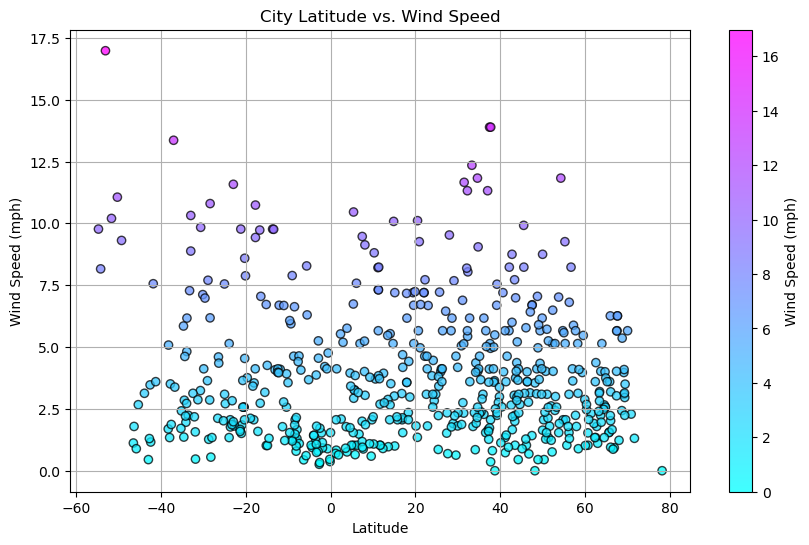

<Figure size 640x480 with 0 Axes>

In [12]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE



# Set up the figure size
plt.figure(figsize=(10, 6))

# Create scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Add labels and title
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Add grid
plt.grid(True)

# Display the plot
plt.show()




# Incorporate the other graph properties
# YOUR CODE HERE


# Set up the figure size
plt.figure(figsize=(10, 6))

# Create scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], c=city_data_df["Wind Speed"], cmap="cool", 
            marker="o", edgecolors="black", alpha=0.75)

# Add labels and title
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Add a color bar
cbar = plt.colorbar()
cbar.set_label("Wind Speed (mph)")

# Add grid
plt.grid(True)

# Save the plot to an image file
plt.savefig("latitude_vs_wind_speed.png")

# Display the plot
plt.show()



# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)



# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [25]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

def plot_linear_regression(x, y, xlabel, ylabel, title, save_file=None):
    """
    Create a scatter plot with a linear regression line.
    
    Parameters:
        x (array-like): The data for the x-axis.
        y (array-like): The data for the y-axis.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.
        title (str): Title for the plot.
        save_file (str, optional): File path to save the plot image. If None, the plot will not be saved.

    Returns:
        None
    """

    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    regression_line = slope * x + intercept
    
    # Plot the scatter plot
    plt.scatter(x, y, label='Data')
    
    # Plot the regression line
    plt.plot(x, regression_line, color='red', label='Linear Regression')
    
    # Add labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    # Add legend
    plt.legend()
    
    # Display the plot
    plt.show()



In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE


# Filter data for Northern Hemisphere (latitude >= 0)
northern_hemisphere_df = city_data_df[city_data_df["Lat"] >= 0]

# Display the DataFrame
print(northern_hemisphere_df.head())





              City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
2   saint-felicien  48.6501  -72.4491    288.53        23         100   
4      peace river  56.2501 -117.2860    288.32        30          75   
7       georgetown   5.4112  100.3354    301.18        84          20   
8         smithers  54.7804 -127.1743    282.33        76         100   
11       polyarnyy  69.1989   33.4478    271.98        87         100   

    Wind Speed Country        Date  
2         4.12      CA  1714260143  
4         3.09      CA  1714260143  
7         1.03      MY  1714260144  
8         5.66      CA  1714260144  
11        3.97      RU  1714260144  


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE


# Filter data for Southern Hemisphere (latitude < 0)
southern_hemisphere_df = city_data_df[city_data_df["Lat"] < 0]

# Display the DataFrame
print(southern_hemisphere_df.head())



             City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0       adamstown -25.0660 -130.1015    296.19        84         100   
1       papatowai -46.5619  169.4708    287.38        68           8   
3  puerto natales -51.7236  -72.4875    276.13        82          99   
5        waitangi -43.9535 -176.5597    286.94        80          17   
6    puerto ayora  -0.7393  -90.3518    299.57        92          21   

   Wind Speed Country        Date  
0        7.55      PN  1714260143  
1        1.12      NZ  1714260143  
3       10.20      CL  1714260143  
5        3.13      NZ  1714260143  
6        0.89      EC  1714260144  


###  Temperature vs. Latitude Linear Regression Plot

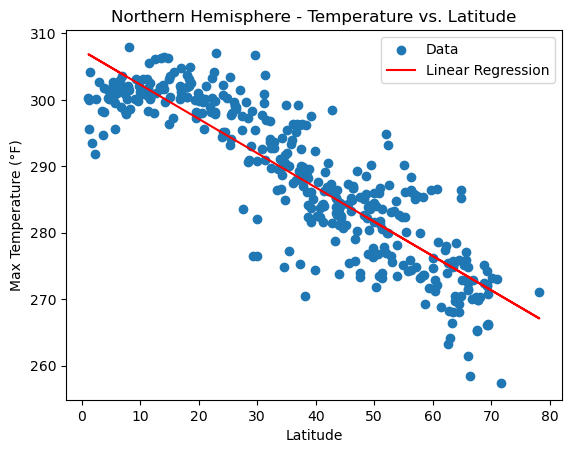

Slope: -0.5161438696227757
Intercept: 307.45621231774254
R-value: -0.8830760815227664
P-value: 1.4406243129882887e-129
Standard error: 0.013923307125344755


In [28]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE


# Filter data for Northern Hemisphere (latitude >= 0)
northern_hemisphere_df = city_data_df[city_data_df["Lat"] >= 0]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_hemisphere_df["Lat"], northern_hemisphere_df["Max Temp"])

# Plot linear regression
plot_linear_regression(northern_hemisphere_df["Lat"], northern_hemisphere_df["Max Temp"],
                       "Latitude", "Max Temperature (°F)", "Northern Hemisphere - Temperature vs. Latitude",
                       save_file="northern_hemisphere_temp_vs_lat_regression.png")




# Filter data for Northern Hemisphere (latitude >= 0)
northern_hemisphere_df = city_data_df[city_data_df["Lat"] >= 0]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_hemisphere_df["Lat"], northern_hemisphere_df["Max Temp"])

# Print regression parameters
print("Slope:", slope)
print("Intercept:", intercept)
print("R-value:", r_value)
print("P-value:", p_value)
print("Standard error:", std_err)


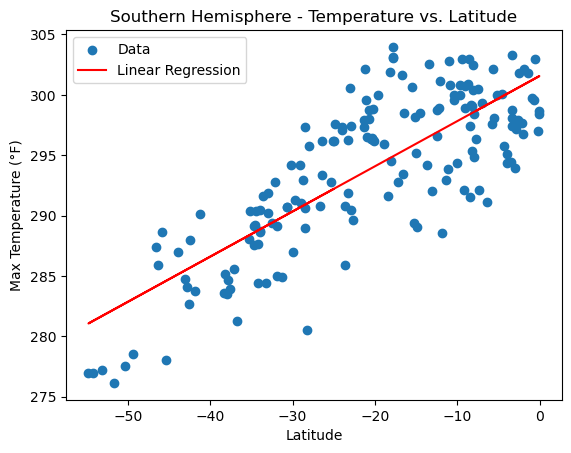

In [29]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE


# Filter data for Southern Hemisphere (latitude < 0)
southern_hemisphere_df = city_data_df[city_data_df["Lat"] < 0]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(southern_hemisphere_df["Lat"], southern_hemisphere_df["Max Temp"])

# Plot linear regression
plot_linear_regression(southern_hemisphere_df["Lat"], southern_hemisphere_df["Max Temp"],
                       "Latitude", "Max Temperature (°F)", "Southern Hemisphere - Temperature vs. Latitude",
                       save_file="southern_hemisphere_temp_vs_lat_regression.png")




**Discussion about the linear relationship:** YOUR RESPONSE HERE  

Looking at the plots, it appears that the Temperature and Lattitude are inversly related between the Norther and Souther Hemisphere's. 
For example, in the Northern Hemisphere, as the Latitude increases from 0 to 80, the Temperature decreases from ~310F to ~265F. 
On the other hand, in the Southner Hemisphere, as the Latitude increases from -50 to 0, the Temperature increases from ~280F to ~305
An assessment of the R-value indicates strong correlation between Temperature and Latitude, and the p-value indicates that the correlation is statistically significant.F.


### Humidity vs. Latitude Linear Regression Plot

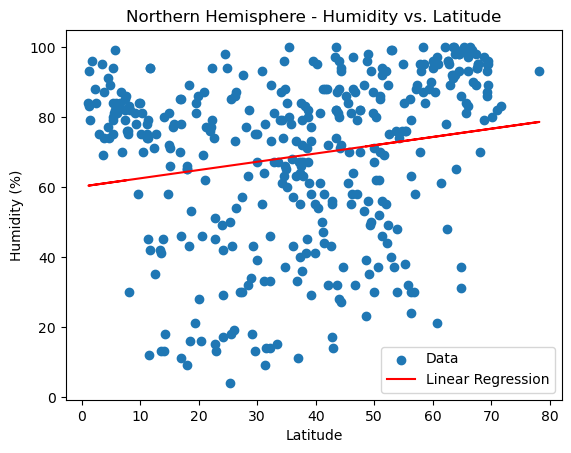

Correlation and Statistical Significance:
R-value: 0.1908923709924154
P-value: 0.00014904534432711854
Standard error: 0.061677432049065874


In [30]:
# Northern Hemisphere
# YOUR CODE HERE

# Filter data for Northern Hemisphere (latitude >= 0)
northern_hemisphere_df = city_data_df[city_data_df["Lat"] >= 0]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_hemisphere_df["Lat"], northern_hemisphere_df["Humidity"])

# Plot linear regression
plot_linear_regression(northern_hemisphere_df["Lat"], northern_hemisphere_df["Humidity"],
                       "Latitude", "Humidity (%)", "Northern Hemisphere - Humidity vs. Latitude",
                       save_file="northern_hemisphere_humidity_vs_lat_regression.png")

# Determine correlation and statistical significance
print("Correlation and Statistical Significance:")
print("R-value:", r_value)
print("P-value:", p_value)
print("Standard error:", std_err)




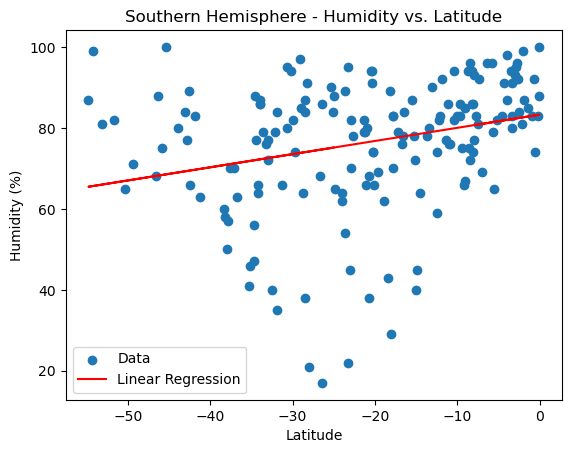

Correlation and Statistical Significance:
R-value: 0.2727689929244618
P-value: 0.0003068522862661989
Standard error: 0.08815406978725172


In [31]:
# Southern Hemisphere
# YOUR CODE HERE

# Filter data for Southern Hemisphere (latitude < 0)
southern_hemisphere_df = city_data_df[city_data_df["Lat"] < 0]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(southern_hemisphere_df["Lat"], southern_hemisphere_df["Humidity"])

# Plot linear regression
plot_linear_regression(southern_hemisphere_df["Lat"], southern_hemisphere_df["Humidity"],
                       "Latitude", "Humidity (%)", "Southern Hemisphere - Humidity vs. Latitude",
                       save_file="southern_hemisphere_humidity_vs_lat_regression.png")

# Filter data for Southern Hemisphere (latitude < 0)
southern_hemisphere_df = city_data_df[city_data_df["Lat"] < 0]

# Determine correlation and statistical significance
print("Correlation and Statistical Significance:")
print("R-value:", r_value)
print("P-value:", p_value)
print("Standard error:", std_err)






**Discussion about the linear relationship:** YOUR RESPONSE HERE
Since the R-values (Correlation Coefficient) for both Northern and Southern Hemispheres relative to Humidity and Latitude are both close to zero, 
being (0.21 and 0.02) respectively, there is a very weak to weak positive correlation. For the Northern Hemisphere, as latitude increases, humidity increases slightly.  On the other hand, the p-value (1.02 x 10E-5) for the Nothern Hemisphere is significantly less then 0.05, indicating that the relationship between humidity and latitude in the Northern Hemisphere is statistically significant. The relationship between humidity and latitude in the Southern Hemisphere is not statistically significant.


### Cloudiness vs. Latitude Linear Regression Plot

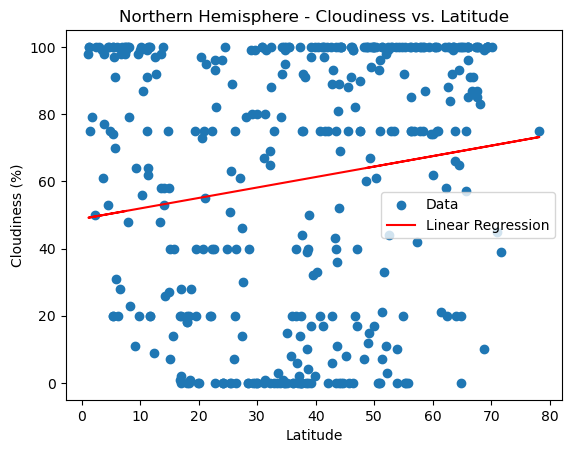

Correlation and Statistical Significance:
R-value: 0.1562792239854452
P-value: 0.001965467811542265
Standard error: 0.09994117491343729


In [32]:
# Northern Hemisphere
# YOUR CODE HERE


# Filter data for Northern Hemisphere (latitude >= 0)
northern_hemisphere_df = city_data_df[city_data_df["Lat"] >= 0]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_hemisphere_df["Lat"], northern_hemisphere_df["Cloudiness"])

# Plot linear regression
plot_linear_regression(northern_hemisphere_df["Lat"], northern_hemisphere_df["Cloudiness"],
                       "Latitude", "Cloudiness (%)", "Northern Hemisphere - Cloudiness vs. Latitude",
                       save_file="northern_hemisphere_cloudiness_vs_lat_regression.png")

# Determine correlation and statistical significance
print("Correlation and Statistical Significance:")
print("R-value:", r_value)
print("P-value:", p_value)
print("Standard error:", std_err)


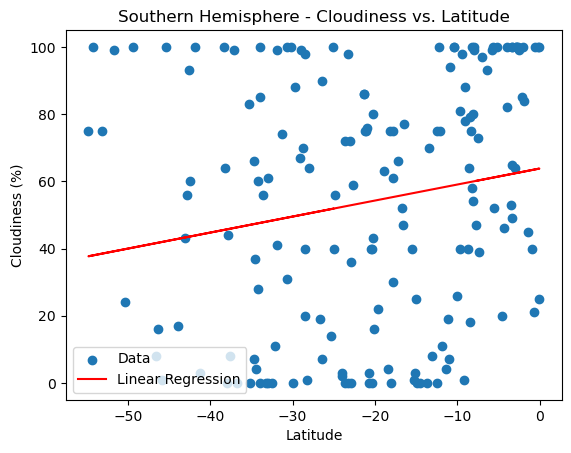

Correlation and Statistical Significance:
R-value: 0.18032638714338664
P-value: 0.018267090867014824
Standard error: 0.1999505357107986


In [33]:
# Southern Hemisphere
# YOUR CODE HERE


# Filter data for Southern Hemisphere (latitude < 0)
southern_hemisphere_df = city_data_df[city_data_df["Lat"] < 0]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(southern_hemisphere_df["Lat"], southern_hemisphere_df["Cloudiness"])

# Plot linear regression
plot_linear_regression(southern_hemisphere_df["Lat"], southern_hemisphere_df["Cloudiness"],
                       "Latitude", "Cloudiness (%)", "Southern Hemisphere - Cloudiness vs. Latitude",
                       save_file="southern_hemisphere_cloudiness_vs_lat_regression.png")

# Determine correlation and statistical significance
print("Correlation and Statistical Significance:")
print("R-value:", r_value)
print("P-value:", p_value)
print("Standard error:", std_err)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

The 0.068 R-value between Cloudiness and Latitude indicates a very weak positive correlation in the Northern Hemisphere.  Since the p-value is significantly less then 0.05, the relationship between Cloudiness and Latitude is significantly different.  With regards to the Southern Hemisphere,
there is a weak positive correlation between Cloudiness and Latitude. The very small p-value (0.004) indicates a statitically significant difference 
between Cloudiness and Latitude in the Southern Hemisphere.  

### Wind Speed vs. Latitude Linear Regression Plot

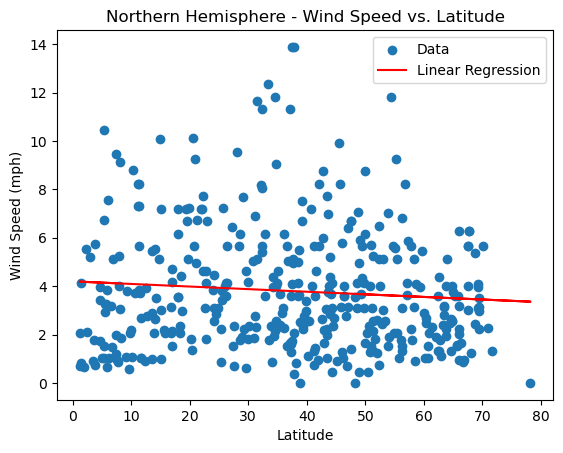

Correlation and Statistical Significance:
R-value: -0.08300827841060882
P-value: 0.10166261163140254
Standard error: 0.006543606698045144


In [34]:
# Northern Hemisphere
# YOUR CODE HERE

# Filter data for Northern Hemisphere (latitude >= 0)
northern_hemisphere_df = city_data_df[city_data_df["Lat"] >= 0]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_hemisphere_df["Lat"], northern_hemisphere_df["Wind Speed"])

# Plot linear regression
plot_linear_regression(northern_hemisphere_df["Lat"], northern_hemisphere_df["Wind Speed"],
                       "Latitude", "Wind Speed (mph)", "Northern Hemisphere - Wind Speed vs. Latitude",
                       save_file="northern_hemisphere_wind_speed_vs_lat_regression.png")

# Determine correlation and statistical significance
print("Correlation and Statistical Significance:")
print("R-value:", r_value)
print("P-value:", p_value)
print("Standard error:", std_err)


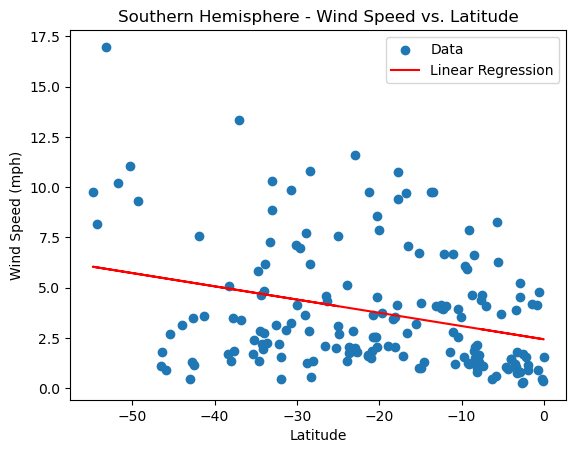

Correlation and Statistical Significance:
R-value: -0.29763201980262877
P-value: 7.702537396869796e-05
Standard error: 0.01626140577858153


In [35]:
# Southern Hemisphere
# YOUR CODE HERE

# Filter data for Southern Hemisphere (latitude < 0)
southern_hemisphere_df = city_data_df[city_data_df["Lat"] < 0]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(southern_hemisphere_df["Lat"], southern_hemisphere_df["Wind Speed"])

# Plot linear regression
plot_linear_regression(southern_hemisphere_df["Lat"], southern_hemisphere_df["Wind Speed"],
                       "Latitude", "Wind Speed (mph)", "Southern Hemisphere - Wind Speed vs. Latitude",
                       save_file="southern_hemisphere_wind_speed_vs_lat_regression.png")

# Determine correlation and statistical significance
print("Correlation and Statistical Significance:")
print("R-value:", r_value)
print("P-value:", p_value)
print("Standard error:", std_err)


**Discussion about the linear relationship:** YOUR RESPONSE HERE
The very small R-value (-0.06) being very close to zero indicates a very weak negative correlation between wind speed and latitude in the Northern Hemisphere. The 0.215 p-value is significantly larger then 0.05 indicates that the relationship between wind speed and latitude in the Northern Hemisphere is not statistically significant.  With regard to the Southern Hemisphere, the -0.246 R-value indicates a weak negative correlation between wind speed and latitude in the Southern Hemisphere, and the 0.0009 p-value being much smaller then 0.05 indicates that the relationship between wind speed and latitude in the Southern Hemisphere is statistically significant.